<a href="https://colab.research.google.com/github/lucerogr/algorithmic-complexity/blob/main/TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git

Cloning into 'algorithmic_complexity'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 104 (delta 50), reused 91 (delta 41), pack-reused 0
Receiving objects: 100% (104/104), 15.59 MiB | 38.09 MiB/s, done.
Resolving deltas: 100% (50/50), done.


In [6]:
from algorithmic_complexity.aclib import graphstuff as gs

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import math
import graphviz as gv

In [4]:
url="https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity/main/data/poblaciones.csv"
poblacionesDF = pd.read_csv(url)

In [5]:
def dist(cp1, cp2):
  la1, lo1 = float(cp1['LATITUD']), float(cp1['LONGITUD'])
  la2, lo2 = float(cp2['LATITUD']), float(cp2['LONGITUD'])
  
  lo1, la1, lo2, la2 = map(math.radians, [lo1, la1, lo2, la2])
  dlo = lo2 - lo1
  dla = la2 - la1
  a = math.sin(dla/2)**2 + math.cos(la1) * math.cos(la2) * math.sin(dlo/2)**2
  c = 2 * math.asin(math.sqrt(a))
  r = 6371

  return round(c * r, 2)

In [7]:
nomdepartamentos = poblacionesDF['DEPARTAMENTO'].unique()
departamentos = dict()
for nom in nomdepartamentos:
  departamentos[nom] = poblacionesDF[poblacionesDF['DEPARTAMENTO'] == nom]
  print(nom, len(departamentos[nom]))

AMAZONAS 25
ANCASH 189
APURIMAC 87
AREQUIPA 80
AYACUCHO 190
CAJAMARCA 97
CUSCO 85
HUANCAVELICA 89
HUANUCO 137
ICA 111
JUNIN 85
LA LIBERTAD 345
LAMBAYEQUE 817
LIMA 172
LORETO 224
MADRE DE DIOS 5
MOQUEGUA 49
PASCO 43
PIURA 504
PUNO 83
SAN MARTIN 68
TACNA 33
TUMBES 72
UCAYALI 163


In [8]:
nomprovincias = poblacionesDF['PROVINCIA'].unique()
provincias = dict()
for nom in nomprovincias:
  provincias[nom] = poblacionesDF[poblacionesDF['PROVINCIA'] == nom]
  print(nom, len(provincias[nom]))

BAGUA 4
BONGARA 8
CHACHAPOYAS 1
UTCUBAMBA 12
ANTONIO RAYMONDI 2
BOLOGNESI 5
CARHUAZ 19
CASMA 14
HUARAZ 38
HUARI 20
HUAYLAS 5
OCROS 2
POMABAMBA 21
RECUAY 28
SANTA 22
SIHUAS 6
YUNGAY 7
ABANCAY 41
ANDAHUAYLAS 8
ANTABAMBA 2
AYMARAES 23
CHINCHEROS 12
GRAU 1
AREQUIPA 24
CAMANA 16
CARAVELI 16
CASTILLA 1
CAYLLOMA 20
CONDESUYOS 3
CANGALLO 20
HUAMANGA 3
HUANCA SANCOS 38
HUANTA 7
LUCANAS 92
PARINACOCHAS 1
VICTOR FAJARDO 29
CAJABAMBA 10
CAJAMARCA 13
CELENDIN 16
CHOTA 6
CONTUMAZA 16
CUTERVO 6
JAEN 11
SAN IGNACIO 2
SAN MARCOS 2
SAN MIGUEL 13
SAN MIMGUEL 1
SANTA CRUZ 1
ACOMAYO 14
CALCA 3
CANAS 4
CANCHIS 12
CHUMBIVILCAS 3
LA CONVENCION 13
PARURO 14
QUISPICANCHI 22
CASTROVIRREYNA 49
CHURCAMPA 1
HUANCAVELICA 6
HUAYTARA 32
TAYACAJA 1
AMBO 36
DOS DE MAYO 7
DOSDEMAYO 1
HUAMALIES 6
HUANUCO SANTA 1
HUANUCO 27
LAURICOCHA 10
LEONCIO PRADO 28
MARAÑON 12
PUERTO INCA 9
CHINCHA 1
ICA 60
NASCA 6
PALPA 30
PISCO 14
CHANCHAMAYO 14
CHUPACA 13
CONCEPCION 1
HUANCAYO 13
JAUJA 1
JUNIN 2
SATIPO 6
TARMA 35
ASCOPE 67
BOLIVAR 

In [9]:
def dijkstra(G, s):
    unvisited = []
    visited = []
    total_weight = 0
    current_node = s
    neighbor = ''

    for node in G.nodes:
        if node == s:
            visited.append(s)
        else:
            unvisited.append(node)
    while unvisited:
        for i, neighbor in enumerate(unvisited):
            if i == 0:
                current_weight = G.edges[s, neighbor]['weight']
                current_node = neighbor
            elif G.edges[s, neighbor]['weight'] < current_weight:
                current_weight = G.edges[s, neighbor]['weight']
                current_node = neighbor
        total_weight += current_weight
        unvisited.remove(current_node)
        visited.append(current_node)
    
    total_weight += G.edges[s, current_node]['weight']
    visited.append(s)
    return visited, total_weight

Ingresar la PROVINCIA y DISTRITO 

Ingrese la provincia para mostrar sus distritos: ICA
Hay  6  distritos 
 
PACHACUTEC EL 1
PACHACUTEC 13
SAN JOSE DE  LOS MOLINOS 1
SAN JOSE DE LOS MOLINOS 7
SANTIAGO 25
YAUCA DEL ROSARIO 13
----------------------------------------------------
Ingrese el DISTRITO para mostrar sus CENTROS POBLADOS: PACHACUTEC


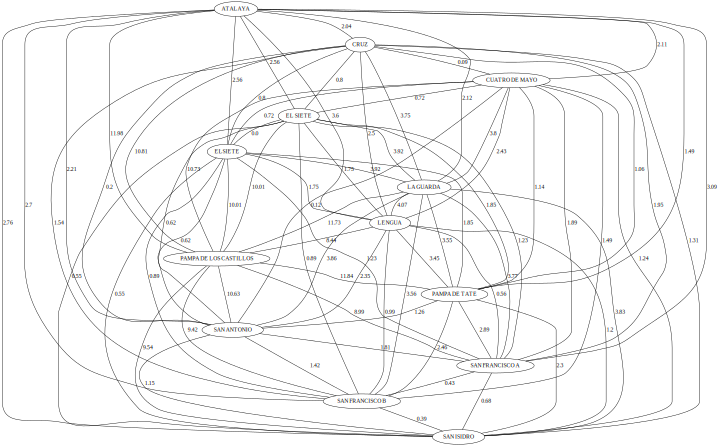

In [11]:
nomprovincia = input("Ingrese la provincia para mostrar sus distritos: ")
nomdistritos = provincias[nomprovincia]['DISTRITO'].unique()
print("Hay ", len(nomdistritos), " distritos ")
print(" ")
nomdistritos

distritos = dict()
for nom in nomdistritos:
  distritos[nom] = provincias[nomprovincia][provincias[nomprovincia]['DISTRITO'] == nom]
  print(nom, len(distritos[nom]))


print("----------------------------------------------------")
nomdistrito = input("Ingrese el DISTRITO para mostrar sus CENTROS POBLADOS: ")
distrito = distritos[nomdistrito]

G = nx.Graph()
col = 'CENTRO POBLADO'
for i, cp1 in distrito.iterrows():
  #print(cp1[col])
  for j, cp2 in distrito.iterrows():
    if cp1[col] != cp2[col]:
      G.add_edge(cp1[col], cp2[col], weight=dist(cp1, cp2))

gs.nx2gv(G, weighted=True, params={'size':'10'})

Ingresar el CENTRO POBLADO

In [12]:
print("----------------------------------------------------")
nomcp = input("Ingrese el CENTRO POBLADO: ")

----------------------------------------------------
Ingrese el CENTRO POBLADO: CRUZ


In [23]:
path, weight = dijkstra(G, nomcp)
print("La ruta más corta que visita cada ciudad es:", path)
print("La distancia de la ruta es:", weight)
responsePath = []
for city in path:
  cp = distrito[distrito["CENTRO POBLADO"] == city]
  responsePath.append({"cp": city,
                       "lat": float(cp["LATITUD"]),
                       "lon": float(cp["LONGITUD"])})
print(responsePath)

La ruta más corta que visita cada ciudad es: ['CRUZ', 'CUATRO DE MAYO', 'SAN ANTONIO', 'EL SIETE', 'ELSIETE', 'PAMPA DE TATE', 'SAN ISIDRO', 'SAN FRANCISCO B', 'SAN FRANCISCO A', 'ATALAYA', 'LENGUA', 'LA GUARDA', 'PAMPA DE LOS CASTILLOS', 'CRUZ']
La distancia de la ruta es: 37.660000000000004
[{'cp': 'CRUZ', 'lat': -14.161188000000001, 'lon': -75.68990500000001}, {'cp': 'CUATRO DE MAYO', 'lat': -14.161976999999998, 'lon': -75.68986}, {'cp': 'SAN ANTONIO', 'lat': -14.163017000000002, 'lon': -75.68984300000001}, {'cp': 'EL SIETE', 'lat': -14.167710000000001, 'lon': -75.686756}, {'cp': 'ELSIETE', 'lat': -14.167710000000001, 'lon': -75.686756}, {'cp': 'PAMPA DE TATE', 'lat': -14.151898000000001, 'lon': -75.69194499999999}, {'cp': 'SAN ISIDRO', 'lat': -14.170467000000002, 'lon': -75.68246500000001}, {'cp': 'SAN FRANCISCO B', 'lat': -14.170075, 'lon': -75.678895}, {'cp': 'SAN FRANCISCO A', 'lat': -14.173461999999999, 'lon': -75.676973}, {'cp': 'ATALAYA', 'lat': -14.14579, 'lon': -75.67960699

Conocer la ruta más corta considerando otros centros poblados como nodo inicial

In [15]:
def path_taken():
    dijkstra(G, nomcp)
    shortest_path = []
    shortest_weight = 0

    for i, node in enumerate(G.nodes):
        path, weight = dijkstra(G, node)
        #print("")
        #print("Ruta", i + 1, "=", path)
        #print("Distancia =", weight)
        if i == 0:
            shortest_weight = weight
            shortest_path = path
            
        elif weight < shortest_weight:
            shortest_weight = weight
            shortest_path = path
        
    print('--------------------------------------')
    print("La ruta más corta que visita cada ciudad es:", shortest_path)
    print("La distancia de la ruta es:", shortest_weight)

path_taken()

--------------------------------------
La ruta más corta que visita cada ciudad es: ['EL SIETE', 'ELSIETE', 'SAN ISIDRO', 'SAN ANTONIO', 'CUATRO DE MAYO', 'CRUZ', 'SAN FRANCISCO B', 'SAN FRANCISCO A', 'LENGUA', 'PAMPA DE TATE', 'ATALAYA', 'LA GUARDA', 'PAMPA DE LOS CASTILLOS', 'EL SIETE']
La distancia de la ruta es: 34.91
